<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction:-Inferential-Statistics---Multiple-Linear-Regression" data-toc-modified-id="Introduction:-Inferential-Statistics---Multiple-Linear-Regression-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction: Inferential Statistics - Multiple Linear Regression</a></span><ul class="toc-item"><li><span><a href="#Dataset" data-toc-modified-id="Dataset-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Dataset</a></span></li><li><span><a href="#Notation-in-matrix-form" data-toc-modified-id="Notation-in-matrix-form-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Notation in matrix form</a></span></li><li><span><a href="#Statistical-Model---Normally-distributed-errors" data-toc-modified-id="Statistical-Model---Normally-distributed-errors-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Statistical Model - Normally distributed errors</a></span></li><li><span><a href="#Test-statistics-and-hypothesis-testing" data-toc-modified-id="Test-statistics-and-hypothesis-testing-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Test statistics and hypothesis testing</a></span></li></ul></li><li><span><a href="#Statistical-Inference:-Implementation-using-Numpy--and-Pandas" data-toc-modified-id="Statistical-Inference:-Implementation-using-Numpy--and-Pandas-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Statistical Inference: Implementation using Numpy  and Pandas</a></span><ul class="toc-item"><li><span><a href="#Custom-Python-class" data-toc-modified-id="Custom-Python-class-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Custom Python class</a></span></li></ul></li><li><span><a href="#Stability-of-the-coefficients-and-multicolinearity" data-toc-modified-id="Stability-of-the-coefficients-and-multicolinearity-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Stability of the coefficients and multicolinearity</a></span><ul class="toc-item"><li><span><a href="#Calculating-the-colinearity-diagnostic-using-Numpy" data-toc-modified-id="Calculating-the-colinearity-diagnostic-using-Numpy-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Calculating the colinearity diagnostic using Numpy</a></span></li><li><span><a href="#Print-results-in-a-format-similar-to-SAS-outputs" data-toc-modified-id="Print-results-in-a-format-similar-to-SAS-outputs-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Print results in a format similar to SAS outputs</a></span></li></ul></li><li><span><a href="#Model-Selection" data-toc-modified-id="Model-Selection-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Model Selection</a></span><ul class="toc-item"><li><span><a href="#Implementation-of-model-selection-in-Python-(to-be-completed)" data-toc-modified-id="Implementation-of-model-selection-in-Python-(to-be-completed)-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Implementation of model selection in Python (to be completed)</a></span></li></ul></li><li><span><a href="#Implementation-of-Multiple-Linear-Regression-using-Statsmodel" data-toc-modified-id="Implementation-of-Multiple-Linear-Regression-using-Statsmodel-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Implementation of Multiple Linear Regression using Statsmodel</a></span></li></ul></div>

# Introduction: Inferential Statistics - Multiple Linear Regression
This notebook builds upon the [first][1] notebook in the series and explores various implementations of *statistical inferences* on a **multiple linear regression model. **


The notebook is divided into the following main sections: 

1. Introduction: notation, model description, formula, hypothesis
2. Inferential statistics: Implementation using Numpy and Pandas
3. Stability of the regression coefficients: multicolinearity, tolerance and VIF
4. Model Selection
5. Implementation using Statsmodel



### Libraries

[1]: https://xavierbourretsicotte.github.io/stats_inference_1.html

In [243]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import scipy.linalg as sl
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
%matplotlib inline
from IPython.core.display import HTML
sns.set() #Making seaborn the default styling 

## Dataset
The dataset is used to predict electricity consumption of housing units equipped with electrical heating, given data (variables) on the housing units.  

There are $P = 6$ explanatory (or independent, exogeneous) variables $x_1, x_2,...x_p$ which are stored in the matrix $\mathbf{X}$:
- SURFACE: surface area of the housing unit in $m^2$
- PERS: number of persons living in the housing unit
- PAVILLON: 1 if the housing unit is a house, 0 for appartments
- AGE: age of the unit
- VOL: volume inside the housing unit in $m^3$
- SBAINS: number of bathrooms

The dependent (or endogeneous) variable $y$ is *"KW: number of KWH consumed during the month of January"* and is stored in the vector $Y$  


In [244]:
#Manually create data set
y = np.array([4805,3783,2689,5683,3750,2684,1478,1685,1980,1075,2423,4253,1754,1873,3487,2954,4762,3076])
x0 = np.array([1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1])
x1 = np.array([130,123,98,178,134,100,78,100,95,78,110,130,73,87,152,128,180,124])
x2 = np.array([4,4,3,6,4,4,3,4,3,4,5,4,2,4,5,5,7,4])
x3 = np.array([1,1,0,1,1,0,0,0,0,0,1,1,0,1,1,1,1,0])
x4 = np.array([65,5,18,77,5,34,7,10,8,5,12,25,56,2,12,20,27,22])
x5 = np.array([410,307,254,570,335,280,180,250,237,180,286,351,220,217,400,356,520,330])
x6 = np.array([1,2,1,3,2,1,1,1,1,1,1,1,1,2,2,1,2,1])

#Convert to DataFrame for easy visualization
Data = pd.DataFrame(data = [x0,x1,x2,x3,x4,x5, x6],).T
Data.columns = [ 'CONSTANT','SURFACE',   'PERS', 'PAVILLON', 'AGE',      'VOL',   'SBAINS']
Data.head()

#Convert to Numpy array for calculations
X = Data.as_matrix()

## Notation in matrix form
As the problem involves multiple variables, notation is simplified by using matrices. The following convention is used:

- $x_p$: sub-script $p$ is used to indicate the variable number. E.g. $x_1$ corresponds to SURFACE
- $x_i$ sub-script $i$ indicates the observation number

Hence we can define the following: 
- vector $\mathbf{y}$ of size $[n \times 1]$ which contains the $n$ observations of the dependent variable
- vector $\mathbf{\hat y}$ of size $[n \times 1]$ which contains the $n$ predictions of the model based on the regression coefficients
- matrix $\mathbf{X}$ of size $[n \times (P+1)]$ which contains the observations $n$ of the $P$ variables, plus a column of $1s$ which will enable the calculation of the y-intercept
- vector $\mathbf{b}$ of size $[(P+1) \times 1)]$ which contains the linear regression coefficients (or parameters)
- vector $\mathbf{e}$ of size $[n \times 1)]$ which contains the residuals observed in the sample



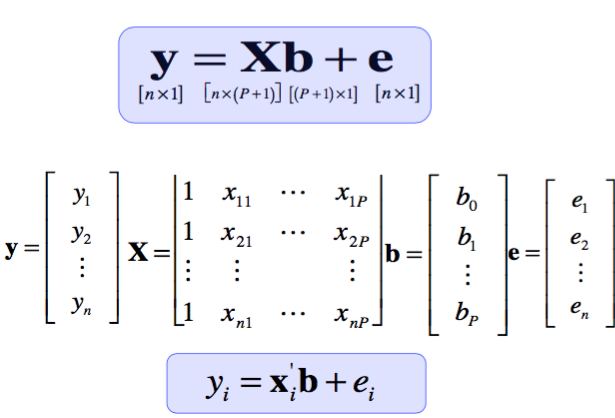

In [245]:
Image("/Users/User/Desktop/Data/Learning_Notebooks/images/mult_lin_reg_model.png")

## Statistical Model - Normally distributed errors 
We base the statistical inferences on a model with the following assumptions: 

$\large Y_{i} = \beta_0 + \beta_1 x_{1,i} + \beta_2 x_{2,i} + ... + \beta_p x_{p,i} + \epsilon_i$

- Errors $\epsilon$ are random variables which are independent, identically distributed with Expectation = 0 and variance = $\sigma^2$
- Errors follow a normal distribution $\epsilon \sim N(0,\sigma^2)$ which can be written in matrix form as $\mathbf{\epsilon \sim (0, \sigma^2 I)}$
- The $P$ dependent variables are assumed to be linearly independent, i.e. no variable is the result of a linear combination of other variables
- $\beta_0, \beta_1,...,\beta_p$ are the unknown population parameters we are trying to estimate. $\beta_0$ is a constant term
- $\mathbf{b} = B_0, B_1,...,B_p$ are estimators of the unknown population parameters and are therefore random variables. Their realization in a given sample are $b_0,b_1,...,b_p$
- $Y_1,...,Y_n$ are random variables from the population, which are realized in a random sample as $y_1,...,y_n$
- $\hat Y_1,...,\hat Y_n$ are random variables and are the values of the linear regression line, realization $\hat y_1,...$
- $\mathbf{e} = e_1,...e_n$ are the observed residuals and are estimators of the true statistical errors

### Properties of the Maximum Likelihood Estimators
In can be shown that the estimators given by the Ordinary Least Square method and the Maximum Likelihood Method *coincide*, have the same properties and can be found in closed form. We present here the main results: 

- Model: $\mathbf{Y = Xb + e}$ 
- Prediction: $\mathbf{ \hat Y = Xb}$
- Residuals: $\mathbf{e = Y - \hat Y}$


Estimators for the regression coefficients: 
- $\mathbf{b = (X'X)^{-1}X'y}$
- $\mathbf{b}$ is non biased: $E(\mathbf{b}) = \mathbf{\beta}$
- Covariance matrix of  $\mathbf{b}$:  $Var(\mathbf{b}) =  \mathbf{ \sigma^2(X'X)^{-1}  }$
- Variance of parameter $B_p$: $\mathbf{\hat \sigma^2_{B_p} = \hat \sigma^2 [(X'X)^{-1}]_{p+1,p+1}   }$ i.e. the diagonal element +1 of the covariance matrix


### Hat matrix and orthogonal projection
Re-arranging the previous results we get:

$\mathbf{\hat y = Xb = X(X'X)^{-1}X'y = Hy }$

$\mathbf{H = X(X'X)^{-1}X' }$

- $\mathbf{H}$ is often called the hat matrix because it adds a "hat" to the vector $y$
- $\mathbf{H}$ is symmetric and idempotent
- $rank(\mathbf{H}) = rank(\mathbf{X})$
- It is a orthogonal projection matrix, which projects the dependent variable into the orthogonal subspace generated by the dependent variables
- The $i-th$ diagonal element of $\mathbf{H} = h_{ii}$ is the leverage of observation $i$



### Computing the expectation and variance of the residuals: $\mathbf{Y - Xb}$
- Let $\mathbf{M = I - H = I - X(X'X)^{-1}X'}$ 
- Then $\mathbf{I = H + M}$ and $\mathbf{M = M' = MM = M'M}$ and $\mathbf{MH = 0}$
- $\mathbf{M}$ is symmetric and idempotent. It is an orthogonal projection matrix to $\mathbf{H}$
- $Rank(\mathbf{M}) = n - P -1$

Residuals can be written as a linear combination of $Y_i$:
- $\mathbf{e = y - Xb = y - Hy = (I - H)y = My}$

Re-writing this as a function of the *true errors* $\epsilon$ (not residuals):
- $\mathbf{e = y - Xb = My = M(X\beta + \epsilon) = MX\beta + M\epsilon = 0 + M\epsilon}$ 

Computing the expectation and variance:
- $\mathbf{E(e) = E(y - Xb) = E(M \epsilon) = ME(\epsilon) = 0}$
- $\mathbf{Var(e) = Var(y - Xb) = Var(M \epsilon) = M Var(\epsilon) = \sigma^2 M = \sigma^2 (I - H) }$
- $\mathbf{S^2_{n -P - 1} = \large \frac{(y - Xb)'(y - Xb)}{n - P - 1} = \frac{e'e}{n - P - 1}} = \large \frac{1}{n - P - 1}\sum_{i=1}^n (e_i)^2$ is an unbiased estimator of the variance of the error

### Implications of the normality hypothesis
As with the simple regression model, the assumption of normally distributed errors allows us to make inferential statements about the random variables. Recall that: 

- $\mathbf{y \sim N(X\beta, \sigma^2I)}$
- $\mathbf{y - Xb \sim N(0, \sigma^2M)}$
- $\mathbf{b \sim N \left( \beta, \sigma^2 (X'X)^{-1} \right)}$
- $\mathbf{B_p \sim N \left(\beta_p, \sigma^2 [(X'X)^{-1}]_{p+1,p+1} \right)}$
- $\large \mathbf{\frac{B_p - \beta_p}{\sigma^2 [(X'X)^{-1}]_{p+1,p+1}} \small \sim N(0,1) }$


### Decomposition of the sum of squares and geometric interpretation
The true errors $\epsilon$ are the difference between the values of $y$ and the true population mean $\bar y$, i.e. $\mathbf{\epsilon = y - \bar y = y - X\beta}$. 

We can write the formula for the total sum of squares in multiple dimensions as: 

- $SS_{Total} =  SS_{Residual} + SS_{Explained}$
- $\mathbf{ || y - \bar y ||^2 = ||y - \hat y ||^2 + ||\hat y - \bar y||^2 }$
- $\mathbf{ || \epsilon^2 ||^2 = || y - Xb ||^2 + || Xb - X \beta ||}$
- $\mathbf{ \epsilon' \epsilon = \epsilon'M\epsilon + \epsilon' H \epsilon }$

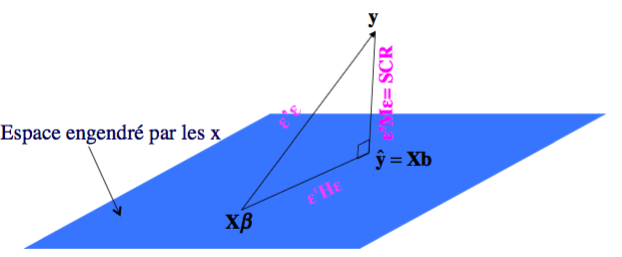

In [246]:
Image("/Users/User/Desktop/Data/Learning_Notebooks/images/triangle.png")

### Distributions of the sides of the triangle
- $\mathbf{ \epsilon' \epsilon } \sim \sigma^2 \chi^2_{n} $

- $\mathbf{ \epsilon' M \epsilon } = \sum (Y_i - \hat Y_i)^2 \sim \sigma^2 \chi^2_{n - P -1} $

- $\mathbf{ \epsilon' H \epsilon } \sim \sigma^2 \chi^2_{P + 1} $

## Test statistics and hypothesis testing
### Student T statistic for the test of significance of parameter $B_p$

$\large \mathbf{\frac{B_p - \beta_p}{S_{B_p}} \sim T_{n-P-1}}$ where $S_{B_p} = S_{n - P -1}[(X'X)^{-1/2}]_{p+1,p+1}$

Under the null hypothesis the parameters (coefficients) are zero: 

- $H_0: \beta_p = 0$
- $H_1: \beta_p \neq 0$

### Fisher statistic for the test of significance of the model as a whole: 

$\large \frac{\sum(\hat Y_i - \bar Y)^2 / P}{ \sum( Y_i - \hat Y_i)^2 / n - P - 1} = \frac{SS_{exp} / P}{SS_{Res} / n -P -1 } \sim F_{P,(n -P - 1)}$

Under the null hypothesis there is no linear relationship between the dependent and independent variables:
- $H_0: Y_i = \beta_0 + \epsilon_i$
- $H_1: Y_i = \beta_0 + \beta_1 x_1 + ... + \beta_p x_i + \epsilon_i$



### Fishier statistic for the test of significance of nested models
**Definition**: a model A is nested in model B if the parameters of model A are a subset of the parameters in model B. In other words if model A is a special case of model B. 

Consider the following two models and corresponding null and alternate hypothesis:
- A sub-model $H_0 = \{ Y_i = \beta_0 + \beta_1 x_{1,i} + ... + \beta_r x_{r,i} + \epsilon_i\} $ which contains $r$ dependent variables
- The complete model $H_1 = \{ Y_i = \beta_0 + \beta_1 x_{1,i} + ... + \beta_p x_{p,i} + \epsilon_i\} $ which contains all $p$ dependent variables where $p > r$
- In the null hypothesis $H_0$ all $P - r$ coefficient of regression are considered to be null: $H_0 = \{ \beta_{r+1} = ... = \beta_P = 0 \} $

The test statistic can be used to test the nullity of the $P-r$ coefficient of regression, effectively comparing the statistical significance of the the nested model and the complete model :

$\large F = \frac{ \left( (SS_{Exp} \ | \ H_1) - (SS_{Exp} \ | \ H_0) \right) / (P - r)  }{(SS_{Res} \ | \ H_1) / (n - P - 1)} \sim F_{(P-r),(n-P-1)}$

### Adjusted R squared
The R-squared value, or coefficient of determination is defined as usual:

$\large R^2 = \frac{SS_{Exp}}{SS_{Tot}}$

The adjusted R-squared takes into account the degrees of freedom of the model and allows to compare models with different numbers of dependent variables. It is an unbiased estimator of the coefficient of determination of the population when it is positive

$\large R_a = \frac{R^2(n-1) - P}{n - P -1}$

# Statistical Inference: Implementation using Numpy  and Pandas
## Custom Python class
*Note that Statsmodel is used for probability calculations*

In [277]:
class multiple_linear_reg_model(object):
    '''Class used to bundle together the data, coefficients, parameters, and statistics 
    of the simple linear regression model '''
    
    def __init__(self,X,y):
        '''Initializing the dataset and the basic computed values:
        x,y : datasets
        n: number of observations 
        x_bar, y_bar: means of variables
        s_xx, s_yy, s_xy: short hand notation, e.g. s_xx = sum(x - x_bar)^2 
        '''
        self.X = X
        self.y = y
        self.n = X.shape[0]
        self.P = X.shape[1] -1
        self.X_bar = np.mean(self.X,0)
        self.y_bar = np.mean(self.y)
        self.XX = self.X.T @ self.X
    
        #Attributes defined here but initialized in the other methods
        self.b, self.H, self.M = None, None, None
        self.e = None
        self.y_hat, self.R2, self.R2_a = None, None, None
        self.SS_tot, self.SS_res, self.SS_exp = None, None, None
        self.S2_n_p_1, self.S2_b, self.S_b  = None, None, None
        self.b_t_values, self.b_t_p_values, self.F_value, self.F_p_value = None, None, None, None
    
    
    def fit(self):
        self.b = np.linalg.inv(self.XX) @ self.X.T @ self.y
        self.H = self.X @ np.linalg.inv(self.XX) @ self.X.T
        self.M = np.identity(self.n) - self.H
        
        #Predicted values and residuals
        self.y_hat = self.X @ self.b
        self.e = self.y - self.y_hat
        
        #Sum of squares
        self.SS_tot = np.sum( (self.y - self.y_bar)**2 )
        self.SS_res = np.sum( (self.y - self.y_hat)**2 )
        self.SS_exp = np.sum( (self.y_hat - self.y_bar)**2 )
        
        #R squared and adjusted R-squared
        self.R2 = self.SS_exp / self.SS_tot
        self.R2_a = (self.R2 * (self.n - 1) - self.P)/(self.n - self.P -1)

        #Variances and standard error of coefficients
        self.S2_n_p_1 = self.SS_res / (self.n - self.P -1)
        self.S2_b = np.diag(self.S2_n_p_1 * np.linalg.inv(self.XX))
        self.S_b = np.sqrt(self.S2_b)
        
    def probabilities(self):
        self.b_t_values = self.b / self.S_b
        self.b_t_p_values = (1 - stats.t.cdf(abs(self.b_t_values), self.n - self.P -1)) * 2
        self.F_value = (self.SS_exp / self.P) / (self.SS_res / (self.n - self.P -1))
        self.F_p_value = (1 - stats.f.cdf(self.F_value, self.P, self.n -self.P -1 ) )
        
        
model = multiple_linear_reg_model(X,y)
model.fit()
model.probabilities()

# Stability of the coefficients and multicolinearity

The standard deviation of $b_j$ is a good indicator of the stability of the estimation of the coefficients of regression. 

Since $var \mathbf{(B) = \sigma^2(X'X)^{-1}}$, if the dependent variables $x_1,...,x_p$ are highly correlated, then the determinant of $\mathbf{X'X}$ will be close to zero and the inverse will have very high values on its main diagonal. It appears that a main source of instability in the estimation of $\beta_p$ is therefore the *multicolinearity* of the dependent variables. 

### Tolerance and VIF
Two measures of multicolinearity between variables are the *tolerance* and *Variance Influence Factor (VIF)*. 

- $Tol(x_p) = 1 - R^2_p$
- $VIF(x_p) = \large \frac{1}{Tol(x_p)} = \frac{1}{1 - R^2_p}$
- $R^2_p$ is the coefficient of determination (i.e. the R-squared) of the linear regression of $x_p$ on all the other predictors. 

In effect, this means running a regression model with $x_p$ as the independent variable and all other $x_1,...,x_{p-1}$ dependent variables as predictors. If $x_p$ is orthogonal to all other variables (i.e. covariance is zero) then $VIF(x_p) = 1$

It can be shown that the variance of a coefficient is a function of the VIF, namely:

$\hat \beta_{B_p} = \large \frac{\hat \sigma^2}{\sum_{i=1}^n (x_{ip} - \bar x_p)^2} \small \times VIF(x_p)$

Values where $Tol < .5$ and $VIF > 2$ are to be investigated for multicolinearity

### Eigenvalues, Condition Index and Condition Number
Other measures of multicolinearity are provided by the correlation matrix of the dependent variables. The correlation matrix is found by normalizing the matrix $\mathbf{X}$ and then computing $\mathbf{X'X}$. 

- **Eigenvalues of the correlation matrix:** each eigenvalue is linked to the correlation of a variable with the others. Printing the eigenvalues from largest to smallest helps visualize colinearity. In particular, eigenvalues close to zero point towards linear dependence. A value of 0 indicates perfect linear dependence, and therefore perfect colinearity
- **Condition Index **: the square root of the ratio between the largest eigenvalue and the eigenvalue associated to each variable. The condition index is equal to 1 if variables are perfectly independent, a large value > 30 highlights a collinearity issue. 


### What to do in cases of multicolinearity
- Increase the sample size
- Select a subset of dependent variables 
- Perform Principal Component Analysis and then regression on the result
- Ridge regression
- PLS regression
- LASSO regression

## Calculating the colinearity diagnostic using Numpy

### Tolerance and VIF using the class defined previously
For each variable in the dataset (i.e. colunm p in matrix X), run the regression model with column p as the y-variable, and the remaining variables as the dependent predictors. For each regression model, calculate the R2 value and the associated tol / VIF. Ingore the columns of 1s which is only for the y-intercept

### Condition index
Use Numpy's built-in correlation coefficient function to calculate the correlation matrix. Compute the eigenvalues, sort them and calculate their ratio. *Note: not used in the printed result table*

In [367]:
def colinearity_diagnostic(X):
    '''Calculate the VIF, Tol and condition number for each variable in the dataset X, 
    Note that the first column of X is assumed to be a column of 1s and is ignored
    These are measures of multicolinearity'''
    #Initialize arrays: does not apply to the 1st variable (intercept)
    VIF = ['']
    Tol = ['']
    Eig = ['']
    Cond_Index = ['']
    
    #VIF and TOL: Loop through each variable of the X data matrix
    for p in range(1,X.shape[1]):
        tmp_X = np.delete(X, p, 1)
        tmp_y = X[:,p]
        tmp_model = multiple_linear_reg_model(tmp_X,tmp_y)
        tmp_model.fit()
        VIF.append(1/(1-tmp_model.R2))
        Tol.append(1 - tmp_model.R2)
    
    
    #Eigenvalues and Condition Index. Rowvar parameter for column variables
    #Not used in the result
    corr_matrix_X = np.corrcoef(X[:,1:], rowvar = False)
    Eig = np.linalg.eig(corr_matrix_X)[0]
    Cond_Index = np.sqrt(max(Eig) / Eig)
    
    return (VIF,Tol,Eig,Cond_Index)

## Print results in a format similar to SAS outputs 

In [370]:
def print_results(model):
    #Print results in a similar format to SAS output
    
    print('Analysis of Variance')
    
    df1 = pd.DataFrame(data = {'1. DF':[model.P,model.n - model.P -1, model.n-1], '2. Sum of Squares':[model.SS_exp,model.SS_res,model.SS_tot],
                              '3. Mean Square': [model.SS_exp / model.P, model.SS_res / (model.n - model.P -1),''], 
                              '4. F Value': [model.F_value,'',''], '5. Pr > F': [model.F_p_value,'',''] }, index = ['Model','Error','Corrected Total'])
        
    display(df1.round(3))
    
    print('Model recap')
    
    df2 = pd.DataFrame(data = {'Values':[model.y_bar,model.R2,model.R2_a] }, index = ['Dependent Mean','R-square','Adj R-square'])
        
    display(df2.round(3))
    
    print('Parameter Estimates')
    
    df3 = pd.DataFrame(data = {'1. Parameter Estimate':model.b,'2. Standard Error': model.S_b,'3. t Value': model.b_t_values, '4. Pr > |t|': model.b_t_p_values,
                              '5. Tolerance': colinearity_diagnostic(model.X)[1], '6. VIF': colinearity_diagnostic(model.X)[0]}, index = ['intercept','SURFACE','PERS','PAVILLON','AGE','VOL','SBAINS'])
        
    display(df3.round(3))

print_results(model)

Analysis of Variance


,1. DF,2. Sum of Squares,3. Mean Square,4. F Value,5. Pr > F
Model,6,2.694978e+07,4.49163e+06,28.333,4.48302e-06
Error,11,1.743828e+06,158530,,
Corrected Total,17,2.869361e+07,,,


Model recap


,Values
Dependent Mean,3010.778
R-square,0.939
Adj R-square,0.906


Parameter Estimates


,1. Parameter Estimate,2. Standard Error,3. t Value,4. Pr > |t|,5. Tolerance,6. VIF
intercept,-226.408,1344.210,-0.168,0.869,,
SURFACE,28.290,54.305,0.521,0.613,0.00314466,318
PERS,-456.262,229.229,-1.990,0.072,0.134088,7.4578
PAVILLON,595.984,276.274,2.157,0.054,0.46732,2.13986
AGE,8.407,27.067,0.311,0.762,0.0262314,38.1223
VOL,4.521,20.086,0.225,0.826,0.0019833,504.211
SBAINS,-78.456,219.732,-0.357,0.728,0.523022,1.91197


--------

# Model Selection
When is it useful to select a sub-model (or nested model) instead of the complete one? 
- When certain dependent variables do not contribute to the model
- When variables are highly colinear
- Moreover, in cases of similar R2 values, a simpler model (i.e. with fewer variables) is generally preferred to a more complex one 

### Step by Step approach:
Comparing all models to each other would result in $2^p$ possible combinations which is unfeasable in most cases. Instead use a step by step approach. There are three main approaches that can be used:
- Forward selection: start with a simple regression and add new variables
- Backward elimination: Start with the complet model and remove variables
- Stepwise: Start with a simple regression, add new variables and remove already existing variables at each step (based on pre-defined set of criteria) 

**Forward Selection approach ** - Which variable select at each step ? 
- Step 1: Select the variable that has the highest correlation with the $y$ variable. 
- Step 2: Calculate the $p-1$ F statistics that compare the models between all variables
- Step 3: Select the variable with the highest F statistic (as long as the p-value is smaller than a pre-defined level SLENTRY)
- Repeat until there are no longer any variables that are statistically significant given the pre-defined level SLENTRY



### Coefficient of Mallows
Given a complete model with P parameters, the coefficient of Mallows allows to measure the quality of the nested model with $r<P$ parameters. 

$C_p = \frac{SS_{Res-r}}{\hat \sigma^2} - (n - 2r)$

- $SS_{Res-r}$ is the sum of square of the residuals in the nested model with $r$ parameters
- $\hat \sigma^2$ is the estimate of $\sigma^2$ in the complete model with $p$ parameters 

According to Mallows, a model with $r$ parameters is satisfactory if the value of $C_p \approx r$ or less. The higher the value of $C_p$ the more uncertainty there is on the estimations


## Implementation of model selection in Python (to be completed)

To be continued...

https://planspace.org/20150423-forward_selection_with_statsmodels/

https://github.com/avinashbarnwal/Python-Stepwise-Regression/blob/master/Code.py

https://github.com/avinashbarnwal/Python-Stepwise-Regression

https://datascience.stackexchange.com/questions/24405/how-to-do-stepwise-regression-using-sklearn/24447#24447?newreg=73e38e7b7b694b7fb595e3f81404da79



# Implementation of Multiple Linear Regression using Statsmodel 

In [374]:
import statsmodels.api as sm
#Fit the model and print output
lm2 = sm.OLS(y,Data)
results = lm2.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     28.33
Date:                Fri, 18 May 2018   Prob (F-statistic):           4.48e-06
Time:                        11:25:23   Log-Likelihood:                -128.87
No. Observations:                  18   AIC:                             271.7
Df Residuals:                      11   BIC:                             278.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CONSTANT    -226.4078   1344.210     -0.168      0.8

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))


### Influence study 

In [375]:
#Creating the influence object from the OLS results
influence = results.get_influence()

#Cooks distance for the x observations
display(influence.cooks_distance[0].round(3))

#Leverage values for the x observations
display(influence.hat_matrix_diag.round(3))

array([0.137, 0.117, 0.035, 0.008, 0.   , 0.062, 0.001, 0.012, 0.038,
       0.021, 0.01 , 0.062, 0.643, 0.005, 0.21 , 0.143, 0.01 , 0.   ])

array([0.518, 0.283, 0.256, 0.758, 0.377, 0.222, 0.164, 0.176, 0.442,
       0.403, 0.433, 0.323, 0.522, 0.707, 0.281, 0.338, 0.511, 0.284])

In [376]:
influence.summary_frame()

,dfb_CONSTANT,dfb_SURFACE,dfb_PERS,dfb_PAVILLON,dfb_AGE,dfb_VOL,dfb_SBAINS,cooks_d,dffits,dffits_internal,hat_diag,standard_resid,student_resid
0,0.267059,-0.191389,-0.254184,0.462714,-0.082546,0.198024,-0.493845,0.137382,0.975485,0.980648,0.518275,0.945438,0.940460
1,-0.166126,0.273037,-0.131212,0.338039,0.170883,-0.256823,0.431373,0.116795,0.957119,0.904194,0.282612,1.440602,1.524923
2,0.295719,-0.244500,-0.341486,-0.233486,-0.285578,0.271764,-0.045340,0.035304,0.490224,0.497122,0.256430,0.846524,0.834778
3,-0.030936,-0.005752,0.022551,-0.051683,0.019529,0.002882,0.130705,0.008234,0.229103,0.240084,0.757877,0.135701,0.129494
4,-0.010776,0.014537,-0.006683,0.008679,0.008888,-0.012626,0.011099,0.000199,0.035563,0.037295,0.377336,0.047908,0.045684
5,-0.201688,0.194796,0.380030,-0.268086,0.269613,-0.222128,-0.031148,0.062181,0.677692,0.659745,0.222312,1.233951,1.267518
6,0.013666,0.000141,0.000387,-0.023370,-0.000922,-0.002490,0.016116,0.001112,0.084264,0.088217,0.164189,0.199038,0.190118
7,0.042115,-0.042565,-0.096038,0.165867,-0.029444,0.043498,0.021053,0.012224,-0.284109,-0.292518,0.176456,-0.631943,-0.613778
8,-0.386304,0.351272,0.379276,0.214081,0.396165,-0.374046,0.038893,0.038137,-0.500352,-0.516678,0.442193,-0.580304,-0.561967
9,-0.131918,0.136634,0.276086,-0.063325,0.161994,-0.164900,0.056113,0.020700,0.366538,0.380659,0.403012,0.463298,0.446111
